# Chapter 4 모델 훈련

In [88]:
# 초기설정

import sys

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

np.random.seed(42)

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ho_chap_04"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### 4.1.1 정규방정식
$\hat{\theta}=(X^TX)^-1\hat{X}y$ 

In [89]:
# 선형데이터 생성
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

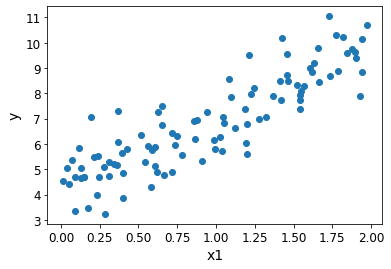

In [90]:
plt.scatter(X, y)
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

In [91]:
import scipy as sp
from numpy import linalg as LA

X_b = np.c_[np.ones((100, 1)), X]   # 모든 샘플에 x0 = 1 을 추가
theta_best = LA.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [92]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [93]:
# theta hat으로 예측
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]   # 모든 샘플에 x0 = 1 을 추가
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

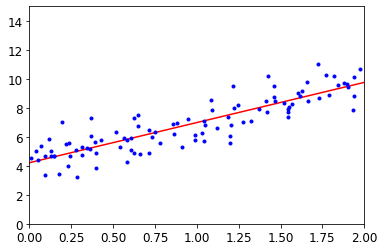

In [94]:
# 모델의 예측을 그래프로
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [95]:
# 선형 회귀
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[4.21509616] [[2.77011339]]
[[4.21509616]
 [9.75532293]]


In [96]:
theta_best_svd, residuals, rank, s = LA.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [97]:
LA.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

## 4.2 경사 하강법

In [98]:
eta = 0.1 # 학습률
n_iterations = 1000
m = 100


theta = np.random.randn(2, 1)   # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [99]:
theta

array([[4.21509616],
       [2.77011339]])

In [100]:
print(X_b.T.shape)
print(X_b.shape)
print(theta.shape)
print(y.shape)
(X_b.T.dot(X_b.dot(theta) -y)).shape

(2, 100)
(100, 2)
(2, 1)
(100, 1)


(2, 1)

### 4.2.2 확률적 경사 하강법

In [101]:
# 학습 스케줄을 활용한 SGD
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)  # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):   # m은 훈련 세트에 있는 샘플 수
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [102]:
theta

array([[4.18475289],
       [2.73036719]])

In [103]:
# SGDRegressor
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())  # y값 펼쳐서 줘야되는듯

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [104]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.22609703]), array([2.79227913]))

## 4.3 다항 회귀

In [105]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

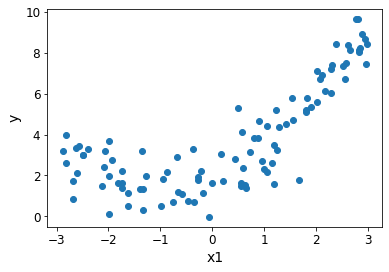

In [106]:
plt.scatter(X, y)
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

In [107]:
# RolynomialFeatures를 활용해 훈련
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[2.94407494]
[2.94407494 8.66757727]


In [108]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.89554823]), array([[0.95707476, 0.49025797]]))

그림 저장: quadratic_predictions_plot


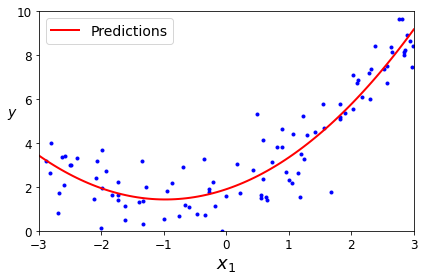

In [109]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.legend(fontsize=14)
save_fig("quadratic_predictions_plot")
plt.show()

### PolynomialFeatures(degree=d)는 특성이 n개인 배열을 특성이<br/> 
### $\frac{(n + d)!}{d!n!}$ 개인 배열로 변환

## 4.4 학습 곡선
훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기(또는 훈련 반복)의 함수로 나타냄

In [110]:
# 학습 곡선 그리는 함수
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val set")
    plt.xlabel("train set size")
    plt.ylabel("RMSE")
    plt.legend(loc=4)

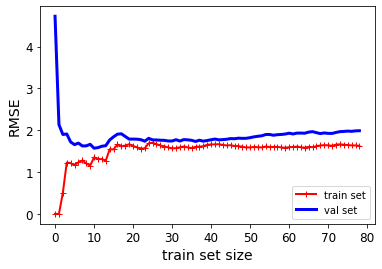

In [111]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

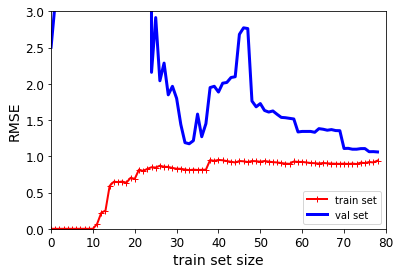

In [112]:
# 10차 다항 회귀 모델의 학습 곡선
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
                                  ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                                  ("lin_reg", LinearRegression()),
                                ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

과대적합을 개선하는 한가지 방법은 검증 오차가 훈련 오차에 근접할 때까지 더 많은 훈련 데이터를 추가하는 것

## 4.5 규제가 있는 선형 모델

### 4.5.1 릿지 회귀

In [113]:
# 행렬 분해와 정규방정식을 사용한 릿지 회귀
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.07720864]])

In [114]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.08461165])

### 4.5.2 라쏘 회귀

In [115]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.04247738])

In [116]:
# lasso 대신 SGD에서 penalty="l1"을 사용한 예
sgd_l = SGDRegressor(penalty="l1")
sgd_l.fit(X, y.ravel())
sgd_l.predict([[1.5]])

array([5.04315719])

### 4.5.3 엘라스틱넷
* 릿지와 라쏘를 절충한 모델
* r=1이면 라쏘와 같지만 r=0은 릿지와 다름

In [117]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.04191364])

### 4.5.4 조기 종료

In [118]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# 데이터 준비
poly_scaler = Pipeline([
                        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
                        ("std_scaler", StandardScaler())
                        ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.inf, warm_start=True,        # warm <- 초기화 유무
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)   # 훈련을 이어서 진행
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch =epoch
        best_model = clone(sgd_reg)

best_model.get_params

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

<bound method BaseEstimator.get_params of SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=True)>

In [119]:
best_epoch

507

## 4.6 로지스틱 회귀

### 4.6.3 결정 경계

In [120]:
# 꽃잎의 너비를 기반으로 붓꽃 종을 감지하는 분류기 만들기
from sklearn import datasets
iris = datasets.load_iris()
print(list(iris.keys()))
X = iris["data"][:, 3:] # 꽃잎의 너비
y = (iris["target"] == 2).astype(np.int)   # 1 Iris-Virginica면 1, 그렇지 않으면 0

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']


In [121]:
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [122]:
# 모델 훈련
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

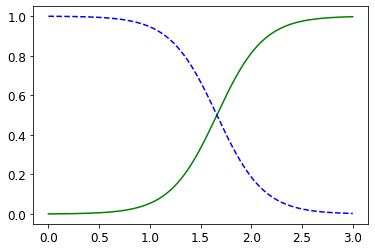

In [123]:
# 꽃잎의 너비가 0~3cm인 꽃에 대한 모델의 추정 확률
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

/usr/local/lib/python3.7/dist-packages/matplotlib/patches.py:1327: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


그림 저장: logistic_regression_plot


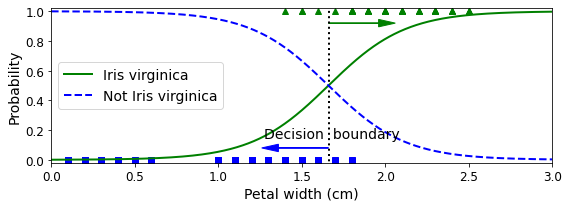

In [124]:
# 그래프 보정
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
save_fig("logistic_regression_plot")
plt.show()

In [125]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

### 4.6.4 소프트맥스 회귀

In [126]:
X = iris["data"][:, (2, 3)]     # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [128]:
softmax_reg.predict([[5, 2]])

array([2])

In [129]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

그림 저장: softmax_regression_contour_plot


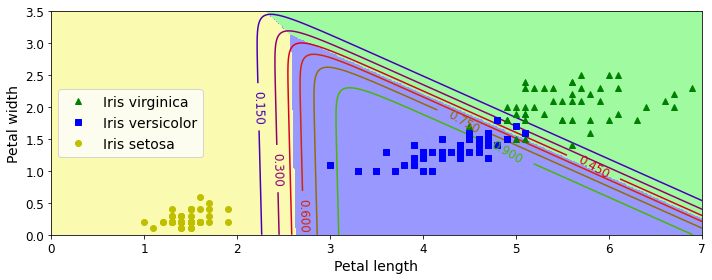

In [130]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
save_fig("softmax_regression_contour_plot")
plt.show()